In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
!pip install tensorflow

### Data Collection

In [3]:
emotion_df = pd.read_csv('/kaggle/input/emotions/text.csv')

In [4]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
violence_df = pd.read_csv('/kaggle/input/gender-based-violence-tweet-classification/Train.csv')

In [6]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [7]:
hate_speech_df = pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv')

In [8]:
hate_speech_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### Data Prepossing

In [9]:
emotion_df.drop(columns= ['Unnamed: 0'], inplace = True)

In [10]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [11]:
violence_df.drop(columns= ['Tweet_ID'], inplace = True)


In [12]:
violence_df.head()


,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [13]:
hate_df = hate_speech_df[['tweet', 'class']]

In [14]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [15]:
violence_df.rename(columns= {'tweet': 'text', 'type': 'label'}, inplace = True)

In [16]:
violence_df.head()

,text,label
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [17]:
hate_df.rename(columns = {'tweet':'text', 'class':'label'}, inplace = True)

In [18]:
hate_df.head()

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [19]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

#### checking for null values

In [20]:
emotion_df.isna().sum(), violence_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [21]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

#### Extracting 18,000 rows from each dataframe

In [22]:
emotion_df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [23]:
violence_df['label'].value_counts()

label
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

In [24]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [25]:
e_df = pd.DataFrame()
for i in range(6):
    subset = emotion_df[emotion_df['label']== i].sample(n=2000, random_state = 3) 
    e_df = pd.concat([e_df, subset])

In [26]:
e_df.shape

(12000, 2)

In [27]:
emotion_df = e_df.copy()

In [28]:
sexual_violence = violence_df[violence_df['label']== 'sexual_violence'].sample(n=4998, random_state= 3)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']

In [29]:
violence_df.shape

(7002, 2)

In [30]:
violence_df= pd.concat([sexual_violence, violence_df], axis = 0)

In [31]:
violence_df.shape

(12000, 2)

In [32]:
hate_df['label'].value_counts()

label
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [33]:
offensive_speech = hate_df[hate_df['label'] == 1].sample(n = 6407, random_state = 3)


In [34]:
hate_df = hate_df[hate_df['label']!= 1]

In [35]:
hate_df= pd.concat([offensive_speech, hate_df], axis = 0)

In [36]:
hate_df.shape

(12000, 2)

In [37]:
emotion_df.reset_index(drop = True, inplace = True)
violence_df.reset_index(drop = True, inplace = True)
hate_df.reset_index(drop = True, inplace = True)

In [38]:
emotion_df.head(3)

,text,label
0,i feel like am doomed to fail and failure,0
1,i never got a motorcylce not for lack of inter...,0
2,i didnt feel so worthless,0


In [39]:
violence_df.head(3)

,text,label
0,He's serving a life sentence for murder. He st...,sexual_violence
1,"people have said, justifying their support of ...",sexual_violence
2,No fr me neither. He look raped on these pics ...,sexual_violence


In [40]:
hate_df.head(3)

,text,label
0,"""@Queen_Kaaat: It took a while for you to find...",1
1,2012-2013 seniors were chill as fuck. this yea...,1
2,RT @RAYCHIELOVESU: I just don't understand the...,1


### Label Encoding

In [41]:
label_encoder = LabelEncoder()
violence_df['label']= label_encoder.fit_transform(violence_df['label'])

In [42]:
violence_df

,text,label
0,He's serving a life sentence for murder. He st...,4
1,"people have said, justifying their support of ...",4
2,No fr me neither. He look raped on these pics ...,4
3,Is it true he pointed a gun at the father's he...,4
4,"What worries me is him being male again, very ...",4
...,...,...
11995,"Court grants woman’s divorce request, after hu...",1
11996,** My husband beats my mother – Wife tells cou...,1
11997,I was told that me saying Jake was a league av...,1
11998,I’m Leaving My Husband Because He Beats And Ra...,1


#### Stopwords Removal

In [43]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
stop_words = set(stopwords.words('english'))

In [45]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [46]:
def remove_stopwords(text):
    all_words = nltk.word_tokenize(text)
    filtered_words = [word for word in all_words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hate_df['text'] = hate_df['text'].apply(remove_stopwords)

In [47]:
emotion_df

,text,label
0,feel like doomed fail failure,0
1,never got motorcylce lack interest rather hone...,0
2,didnt feel worthless,0
3,feel people ostracised idiotic mentality sick ...,0
4,sighed deeply feeling drained,0
...,...,...
11995,look back bank statements feel little shocked ...,5
11996,feel like really amazing entry point mainstrea...,5
11997,feeling even dont particularly care movie youl...,5
11998,still feel terribly overwhelmed yesterday,5


#### Tokenization


In [48]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hate_df['text']]))

In [49]:
emotion_sequences = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [50]:
emotion_df['text'].iloc[2]

'didnt feel worthless'

In [51]:
emotion_sequences[2:3]

[[221, 1, 1769]]

In [52]:
max_length = 50
emotion_padded = pad_sequences(emotion_sequences, maxlen = max_length, padding = 'post')
violence_padded = pad_sequences(violence_sequences, maxlen = max_length, padding = 'post')
hate_padded = pad_sequences(hate_sequences, maxlen = max_length, padding = 'post')

In [53]:
emotion_padded[2:3]

array([[ 221,    1, 1769,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)

#### Generating labels in numpy array format

In [54]:
emotion_labels = np.array(emotion_df['label'])
violence_labels = np.array(violence_df['label'])
hate_labels = np.array(hate_df['label'])

### Model Defination

In [55]:
#prepare different input for eat data set
emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [56]:
#defining multiple input layers for each task
emotion_input_layer = keras.layers.Input(shape = (max_length,), name = 'emotion_input')
violence_input_layer = keras.layers.Input(shape = (max_length,), name = 'violence_input')
hate_input_layer = keras.layers.Input(shape = (max_length,), name = 'hate_input')

In [57]:
#use as shared embedding layer
embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 128)

In [58]:
#apply the embedding layer to each input
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [59]:
#shared LSTM layer
shared_lstm = keras.layers.LSTM(64, return_sequences = True)

In [60]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [61]:
#shared global average pooling layer and dropout layer
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [62]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [63]:
#output layers
emotion_output = keras.layers.Dense(6, activation = 'softmax', name = 'emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5, activation = 'softmax', name = 'violence_output')(violence_features)
hate_output = keras.layers.Dense(3, activation = 'softmax', name = 'hate_output')(hate_features)

In [64]:
# compile the model with multiple inputs and output
model = keras.models.Model(inputs = [emotion_input_layer, violence_input_layer, hate_input_layer], 
                          outputs = [emotion_output, violence_output, hate_output])
model.compile(optimizer = 'adam', 
                loss= {
                    'emotion_output' : 'sparse_categorical_crossentropy', 
                    'violence_output' : 'sparse_categorical_crossentropy',
                    'hate_output' : 'sparse_categorical_crossentropy'
                }, 
              metrics = {
                  'emotion_output': 'accuracy',
                  'violence_output': 'accuracy',
                  'hate_output': 'accuracy'
              })

In [65]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ emotion_input             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ violence_input            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hate_input (InputLayer)   │ (None, 50)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 50, 128)        │      5,363,712 │ emotion_input[0][0],   │
│                           │                        │                │ violence_input[0][0],  │
│                           │                        │                │ hate_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 50, 64)         │         49,408 │ embedding[0][0],       │
│                           │                        │                │ embedding[1][0],       │
│                           │                        │                │ embedding[2][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 64)             │              0 │ lstm[0][0],            │
│ (GlobalAveragePooling1D)  │                        │                │ lstm[1][0], lstm[2][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ emotion_output (Dense)    │ (None, 6)              │            390 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ violence_output (Dense)   │ (None, 5)              │            325 │ dropout[1][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hate_output (Dense)       │ (None, 3)              │            195 │ dropout[2][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,414,030 (20.65 MB)

 Trainable params: 5,414,030 (20.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model with saperate inputs
model.fit(x = { 'emotion_input' : emotion_input,
              'violence_input' : violence_input,
              'hate_input' : hate_input}, 
         y = {'emotion_output' : emotion_labels, 
             'violence_output' : violence_labels,
             'hate_output' : hate_labels}, 
         epochs = 10, 
         batch_size = 4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 217s 71ms/step - emotion_output_accuracy: 0.2273 - hate_output_accuracy: 0.6843 - loss: 3.4750 - violence_output_accuracy: 0.5283
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 212s 71ms/step - emotion_output_accuracy: 0.8301 - hate_output_accuracy: 0.7613 - loss: 1.8470 - violence_output_accuracy: 0.7509
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 211s 70ms/step - emotion_output_accuracy: 0.9483 - hate_output_accuracy: 0.7850 - loss: 1.2557 - violence_output_accuracy: 0.8154
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 211s 70ms/step - emotion_output_accuracy: 0.9620 - hate_output_accuracy: 0.8423 - loss: 0.8337 - violence_output_accuracy: 0.8918
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 211s 70ms/step - emotion_output_accuracy: 0.9738 - hate_output_accuracy: 0.8787 - loss: 0.5760 - violence_output_accuracy: 0.9287
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 212s 71ms/step - emotion_output_accuracy: 0.9782 - hate_output_accuracy: 0.9050 - loss: 0.4382 - v

### Prediction and Evaluation

In [67]:
prediction = model.predict({'emotion_input' : emotion_input,
                              'violence_input' : violence_input,
                              'hate_input' : hate_input})

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


In [68]:
prediction

[array([[9.9999887e-01, 2.0266492e-07, 2.3633481e-08, 4.2532378e-07,
         3.6111845e-07, 1.9808066e-09],
        [9.9992305e-01, 2.4770845e-05, 6.0275929e-06, 1.3421413e-05,
         3.1634721e-05, 9.1700429e-07],
        [9.9996442e-01, 7.8785333e-06, 2.4168551e-07, 2.3029488e-05,
         4.3758155e-06, 3.5664840e-08],
        ...,
        [1.4167241e-05, 1.8272522e-05, 2.0481016e-06, 4.9898852e-05,
         1.4240165e-04, 9.9977326e-01],
        [4.5293127e-06, 6.5171400e-05, 9.1449792e-06, 2.1588769e-06,
         1.8237055e-03, 9.9809527e-01],
        [7.7113179e-07, 1.9902068e-06, 1.5226365e-07, 1.3424675e-06,
         2.4126515e-04, 9.9975455e-01]], dtype=float32),
 array([[1.0669849e-07, 2.9975445e-06, 2.3215309e-06, 1.2416434e-07,
         9.9999434e-01],
        [1.8910484e-07, 2.8049541e-05, 3.5341957e-06, 1.1711519e-06,
         9.9996704e-01],
        [3.3595995e-07, 1.0337530e-05, 6.6843189e-05, 1.6405244e-06,
         9.9992079e-01],
        ...,
        [3.8700032e-0

In [69]:
emotion_pred = np.argmax(prediction[0], axis = 1)
violence_pred = np.argmax(prediction[1], axis = 1)
hate_pred = np.argmax(prediction[2], axis = 1)

In [70]:
def plot_cm(true, pred, title, labels):
    cf = confusion_matrix(true, pred, normalize = 'true')
    plt.figure(figsize = (7,6))
    sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels = labels, yticklabels = labels)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    
emotion_label_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_label_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_violence', 'economic_violence']
hate_label_text = ['offensive_speech', 'Neither', 'Hate_speech']

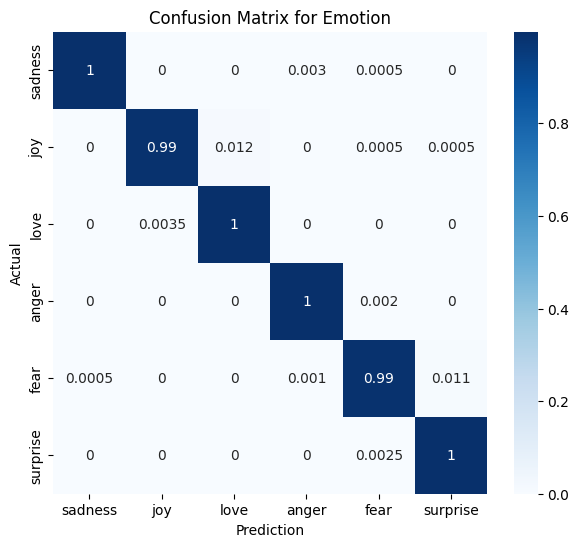

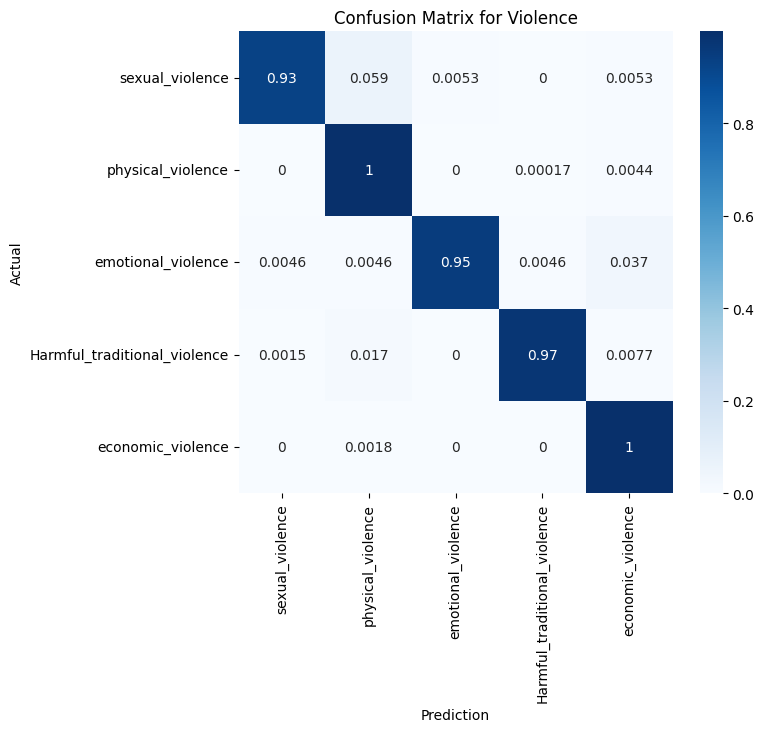

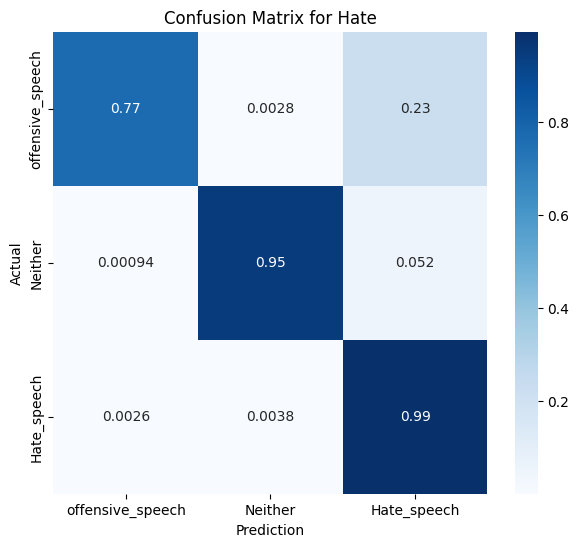

In [71]:
plot_cm(emotion_labels, emotion_pred,'Confusion Matrix for Emotion', emotion_label_text )
plot_cm(violence_labels, violence_pred,'Confusion Matrix for Violence', violence_label_text )
plot_cm(hate_labels, hate_pred,'Confusion Matrix for Hate', hate_label_text )

#### Manual Testing

In [72]:
def classify_text(input_text):
    #preprocess the input text
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen = max_length, padding = 'post')
    
    #prediction
    predictions = model.predict({'emotion_input' : input_padded,
                              'violence_input' : input_padded,
                              'hate_input' : input_padded})
    emotion_pred = np.argmax(prediction[0], axis = 1)[0]
    violence_pred = np.argmax(prediction[1], axis = 1)[0]
    hate_pred = np.argmax(prediction[2], axis = 1)[0]

    #determine major label
    major_labels = ['Emotion', 'Violence', 'Hate']
    major_label_index = np.argmax([np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])])
    major_label = major_labels[major_label_index]

    #determine sub-labels
    emotion_label_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    violence_label_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_violence', 'economic_violence']
    hate_label_text = ['offensive_speech', 'Neither', 'Hate_speech']

    if major_label == 'Emotion':
        sub_label = emotion_label_text[emotion_pred]
    elif major_label == 'Violence':
        sub_label = violence_label_text[violence_pred]
    else:
        sub_label = hate_label_text[hate_pred]
    return major_label, sub_label



In [73]:
import ipywidgets as widgets
from IPython.display import display

In [74]:
#define text widget and placeholder
input_text_widget = widgets.Text(
    description = 'Input text: ',
    placeholder = 'Enter Your Text'
)

In [75]:
#define classify button
button = widgets.Button(description = 'classify')

In [76]:
#define an output area to display results
output = widgets.Output()

In [77]:
#function to handle event
def on_button_click(b):
    with output:
        output.clear_output() #clear previous output
        input_text = input_text_widget.value
        major_label, sub_label = classify_text(input_text)
        print('Major label:' , major_label)
        print('Sub label:', sub_label )

#attach the button on bottom
button.on_click(on_button_click)

In [78]:
display(input_text_widget, button, output)

Text(value='', description='Input text: ', placeholder='Enter Your Text')

Button(description='classify', style=ButtonStyle())

Output()